# Loading Data

In [2]:
# Loading important libraries & integrated Data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the combined dataset
integrated_data = pd.read_csv('integrated_data.csv')

print(integrated_data.head())


              DateTime  Junction  Vehicles           ID            date_time  \
0  2015-01-11 00:00:00         1        15  20151101001  2009-01-11 00:00:00   
1  2015-01-11 00:00:00         1        15  20151101001  2010-01-11 00:00:00   
2  2015-01-11 00:00:00         1        15  20151101001  2011-01-11 00:00:00   
3  2015-01-11 00:00:00         1        15  20151101001  2012-01-11 00:00:00   
4  2015-01-11 00:00:00         1        15  20151101001  2013-01-11 00:00:00   

   maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  ...  precipMM  \
0      27.0      15.0           0.0     11.6      6.0  ...       0.0   
1      26.0      17.0           0.0     11.6      5.0  ...       0.0   
2      28.0      14.0           0.0     11.6      5.0  ...       0.0   
3      29.0      17.0           0.0     11.6      5.0  ...       0.0   
4      29.0      16.0           0.0     11.6      6.0  ...       0.0   

   pressure     tempC visibility winddirDegree windspeedKmph  date  day  \
0    1016.0

In [2]:
#Convert date columns to datetime
integrated_data['DateTime'] = pd.to_datetime(integrated_data['DateTime'])
integrated_data['date_time'] = pd.to_datetime(integrated_data['date_time'])
print(integrated_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92040 entries, 0 to 92039
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DateTime           92040 non-null  datetime64[ns]
 1   Junction           92040 non-null  int64         
 2   Vehicles           92040 non-null  int64         
 3   ID                 92040 non-null  int64         
 4   date_time          92040 non-null  datetime64[ns]
 5   maxtempC           92040 non-null  float64       
 6   mintempC           92040 non-null  float64       
 7   totalSnow_cm       92040 non-null  float64       
 8   sunHour            92040 non-null  float64       
 9   uvIndex            92040 non-null  float64       
 10  uvIndex.1          92040 non-null  float64       
 11  moon_illumination  92040 non-null  float64       
 12  moonrise           92040 non-null  object        
 13  moonset            92040 non-null  object        
 14  sunris

# Data cleaning
### Missing values

In [3]:
# Checking for missing values
missing_values = integrated_data.isnull().sum()
print(missing_values)

DateTime                0
Junction                0
Vehicles                0
ID                      0
date_time               0
maxtempC                0
mintempC                0
totalSnow_cm            0
sunHour                 0
uvIndex                 0
uvIndex.1               0
moon_illumination       0
moonrise                0
moonset                 0
sunrise                 0
sunset                  0
DewPointC               0
FeelsLikeC              0
HeatIndexC              0
WindChillC              0
WindGustKmph            0
cloudcover              0
humidity                0
precipMM                0
pressure                0
tempC                   0
visibility              0
winddirDegree           0
windspeedKmph           0
date                 3168
day                  3168
holiday              3168
holiday_type         3168
dtype: int64


In [4]:
# Dropping columns with a high percentage of missing values
integrated_data.drop(columns=['date', 'day', 'holiday', 'holiday_type'], inplace=True)

In [5]:
# filling in any missing values in the DataFrame integrated_data with the mean value of the corresponding column. 
integrated_data.fillna(integrated_data.mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13624\3924144531.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  combined_data.fillna(combined_data.mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13624\3924144531.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_data.fillna(combined_data.mean(), inplace=True)


In [6]:
# Step 3: Droping irrelevant columns
integrated_data.drop(columns=['ID'], inplace=True)

In [8]:
print(integrated_data)

                 DateTime  Junction  Vehicles           date_time  maxtempC  \
0     2015-01-11 00:00:00         1        15 2009-01-11 00:00:00      27.0   
1     2015-01-11 00:00:00         1        15 2010-01-11 00:00:00      26.0   
2     2015-01-11 00:00:00         1        15 2011-01-11 00:00:00      28.0   
3     2015-01-11 00:00:00         1        15 2012-01-11 00:00:00      29.0   
4     2015-01-11 00:00:00         1        15 2013-01-11 00:00:00      29.0   
...                   ...       ...       ...                 ...       ...   
92035 2017-06-30 19:00:00         4        11 2019-12-31 23:00:00      25.0   
92036 2017-06-30 20:00:00         4        30 2019-12-31 23:00:00      25.0   
92037 2017-06-30 21:00:00         4        16 2019-12-31 23:00:00      25.0   
92038 2017-06-30 22:00:00         4        22 2019-12-31 23:00:00      25.0   
92039 2017-06-30 23:00:00         4        12 2019-12-31 23:00:00      25.0   

       mintempC  totalSnow_cm  sunHour  uvIndex  uv

In [9]:
# Normalize numerical features
numerical_features = ['Vehicles', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 
                      'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 
                      'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph']
scaler = StandardScaler()
integrated_data[numerical_features] = scaler.fit_transform(integrated_data[numerical_features])


In [10]:
# Verifying data cleaning
print(integrated_data.head())
print(integrated_data.info())
print(integrated_data.describe())

    DateTime  Junction  Vehicles  date_time  maxtempC  mintempC  totalSnow_cm  \
0 2015-01-11         1  -0.14097 2009-01-11  0.219491 -1.564123           0.0   
1 2015-01-11         1  -0.14097 2010-01-11 -0.177560 -0.616582           0.0   
2 2015-01-11         1  -0.14097 2011-01-11  0.616543 -2.037894           0.0   
3 2015-01-11         1  -0.14097 2012-01-11  1.013594 -0.616582           0.0   
4 2015-01-11         1  -0.14097 2013-01-11  1.013594 -1.090352           0.0   

    sunHour   uvIndex  uvIndex.1  ...  WindChillC WindGustKmph cloudcover  \
0  0.586658  1.165652        1.0  ...   -1.304933     0.030593  -1.529921   
1  0.586658 -0.417307        1.0  ...   -0.702150    -0.749465   0.367961   
2  0.586658 -0.417307        1.0  ...   -1.304933     0.615638  -1.874991   
3  0.586658 -0.417307        1.0  ...   -0.702150    -1.724539   0.928699   
4  0.586658  1.165652        1.0  ...   -1.304933     0.615638  -1.486788   

   humidity  precipMM  pressure     tempC  visibil

# Feature Engineering

In [11]:
import numpy as np

# Create time-based features
integrated_data['hour'] = integrated_data['DateTime'].dt.hour
integrated_data['day'] = integrated_data['DateTime'].dt.day
integrated_data['month'] = integrated_data['DateTime'].dt.month
integrated_data['day_of_week'] = integrated_data['DateTime'].dt.dayofweek
integrated_data['is_weekend'] = integrated_data['day_of_week'].isin([5, 6]).astype(int)  # 5: Saturday, 6: Sunday

# Create lag features
integrated_data['lag_1'] = integrated_data['Vehicles'].shift(1)
integrated_data['lag_2'] = integrated_data['Vehicles'].shift(2)
integrated_data['lag_3'] = integrated_data['Vehicles'].shift(3)

# Drop rows with NaN values created by lag features
integrated_data.dropna(inplace=True)

# Check the resulting DataFrame
print(integrated_data.head())
print(integrated_data.info())


    DateTime  Junction  Vehicles  date_time  maxtempC  mintempC  totalSnow_cm  \
3 2015-01-11         1  -0.14097 2012-01-11  1.013594 -0.616582           0.0   
4 2015-01-11         1  -0.14097 2013-01-11  1.013594 -1.090352           0.0   
5 2015-01-11         1  -0.14097 2014-01-11  0.616543 -1.564123           0.0   
6 2015-01-11         1  -0.14097 2015-01-11 -0.177560 -2.985436           0.0   
7 2015-01-11         1  -0.14097 2016-01-11  0.219491 -2.037894           0.0   

    sunHour   uvIndex  uvIndex.1  ...  winddirDegree windspeedKmph hour day  \
3  0.586658 -0.417307        1.0  ...       1.286170     -1.859814    0  11   
4  0.586658  1.165652        1.0  ...      -0.411496     -0.171996    0  11   
5  0.586658  1.165652        1.0  ...      -0.156846     -0.413113    0  11   
6  0.586658 -0.417307        1.0  ...      -1.090562     -0.654230    0  11   
7  0.586658 -0.417307        1.0  ...      -0.377542     -0.413113    0  11   

  month  day_of_week  is_weekend    la

# ARIMA for Time Series Forecasting

### Importing neccessary libraries

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

### Preparing the data

In [13]:
integrated_data.set_index('DateTime', inplace=True)
integrated_data.sort_index(inplace=True)


### Split the data

In [ ]:
train_size = int(len(integrated_data) * 0.8)
train, test = integrated_data.iloc[:train_size], integrated_data.iloc[train_size:]


### Train Arima model

In [15]:
model = ARIMA(train['Vehicles'], order=(5, 1, 0))  # (p,d,q) order can be tuned
arima_model = model.fit()
print(arima_model.summary())


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                73629
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -72246.755
Date:                Tue, 30 Jul 2024   AIC                         144505.510
Time:                        06:43:39   BIC                         144560.751
Sample:                             0   HQIC                        144522.509
                              - 73629                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9301      0.002   -397.640      0.000      -0.935      -0.926
ar.L2         -0.7469      0.003   -243.014      0.000      -0.753      -0.741
ar.L3         -0.4373      0.003   -126.367      0.0

### Forecast and Evaluate:

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


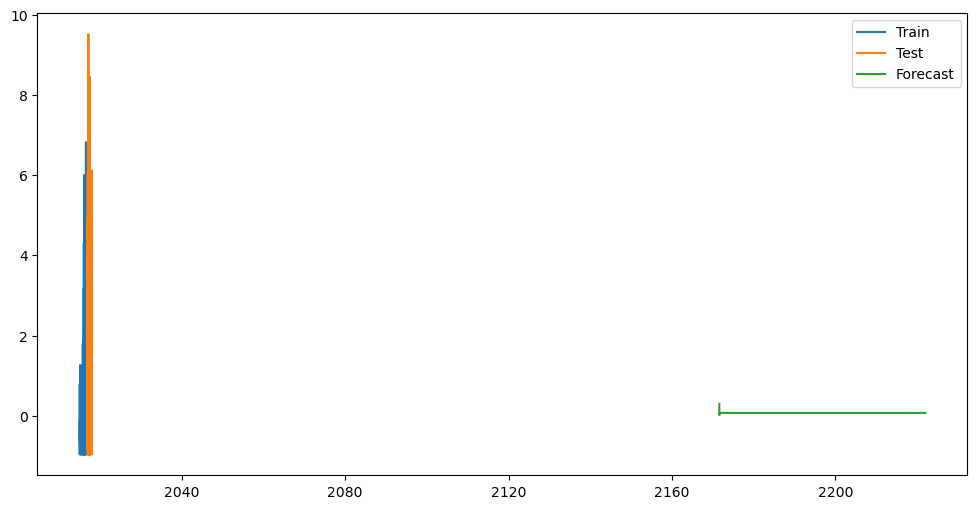

Mean Squared Error: 2.5204875258114154


In [16]:
forecast = arima_model.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(train['Vehicles'], label='Train')
plt.plot(test['Vehicles'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Vehicles'], forecast)
print(f'Mean Squared Error: {mse}')


### Hyperparameter Tuning with grid search

In [17]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float("inf"), None
for param in pdq:
    try:
        temp_model = ARIMA(train['Vehicles'], order=param)
        temp_model_fit = temp_model.fit()
        temp_forecast = temp_model_fit.forecast(steps=len(test))
        temp_mse = mean_squared_error(test['Vehicles'], temp_forecast)
        if temp_mse < best_score:
            best_score, best_cfg = temp_mse, param
        print(f'ARIMA{param} MSE={temp_mse}')
    except:
        continue

print(f'Best ARIMA{best_cfg} MSE={best_score}')


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 0, 0) MSE=2.7999879378911112


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 0, 1) MSE=2.7999874937796965


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 0, 2) MSE=2.7999893034223344


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 1, 0) MSE=2.7883866987465433


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 1, 1) MSE=2.4496282439401735


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 1, 2) MSE=2.481557327059897


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 2, 0) MSE=9673761.545895131


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anacond

ARIMA(0, 2, 1) MSE=3.6685783893611004


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(0, 2, 2) MSE=2.7365130171214367


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(1, 0, 0) MSE=2.799980618203726


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

ARIMA(1, 0, 1) MSE=2.799437087847007


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(1, 0, 2) MSE=2.799720027932301


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(1, 1, 0) MSE=2.9503876155207376


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(1, 1, 1) MSE=2.4688249947923766


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(1, 1, 2) MSE=2.4868919750238545


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(1, 2, 0) MSE=31744423.42531973


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anacond

ARIMA(1, 2, 1) MSE=3.0473797930276465


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anacond

ARIMA(1, 2, 2) MSE=2.41792993413788


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 0, 0) MSE=2.7999861643280464


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

ARIMA(2, 0, 1) MSE=2.7996156638012115


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 0, 2) MSE=2.7998325496991185


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 1, 0) MSE=2.5498827622958258


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 1, 1) MSE=2.4846511289638293


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 1, 2) MSE=2.475464899825413


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 2, 0) MSE=2767946.4769344386


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

ARIMA(2, 2, 1) MSE=2.528316498056169


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anacond

ARIMA(2, 2, 2) MSE=2.864838214954643
Best ARIMA(1, 2, 2) MSE=2.41792993413788


### Fit the best ARIMA model (ARIMA(1, 2, 2)) on the training data.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the best ARIMA model
best_arima_model = ARIMA(train['Vehicles'], order=(1, 2, 2)).fit()

# Forecast
best_forecast = best_arima_model.forecast(steps=len(test))

# Evaluate the forecast
best_mse = mean_squared_error(test['Vehicles'], best_forecast)
print(f'Best ARIMA(1, 2, 2) MSE={best_mse}')


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anacond

Best ARIMA(1, 2, 2) MSE=2.41792993413788


# Model Evaluation & Cross Validation

### Evaluation Metrics

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'test' is your validation dataset and 'best_forecast' are your model predictions
mae = mean_absolute_error(test['Vehicles'], best_forecast)
rmse = np.sqrt(mean_squared_error(test['Vehicles'], best_forecast))
r2 = r2_score(test['Vehicles'], best_forecast)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 1.054794353187264
RMSE: 1.5549694318982221
R-squared: -0.07634467101304088


# Evaluate model performance

###  Checking Data Types and Indices

In [23]:
# Print indices and data types
print("Test Index:")
print(test.index)

print("Best Forecast Index:")
print(best_forecast.index)

print("Test Vehicles Data Type:")
print(test['Vehicles'].dtype)

print("Best Forecast Data Type:")
print(best_forecast.dtype)


Test Index:
DatetimeIndex(['2016-12-17 16:00:00', '2016-12-17 16:00:00',
               '2016-12-17 16:00:00', '2016-12-17 17:00:00',
               '2016-12-17 17:00:00', '2016-12-17 17:00:00',
               '2016-12-17 18:00:00', '2016-12-17 18:00:00',
               '2016-12-17 18:00:00', '2016-12-17 19:00:00',
               ...
               '2017-12-06 21:00:00', '2017-12-06 21:00:00',
               '2017-12-06 22:00:00', '2017-12-06 22:00:00',
               '2017-12-06 22:00:00', '2017-12-06 22:00:00',
               '2017-12-06 23:00:00', '2017-12-06 23:00:00',
               '2017-12-06 23:00:00', '2017-12-06 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=18408, freq=None)
Best Forecast Index:
RangeIndex(start=0, stop=18408, step=1)
Test Vehicles Data Type:
float64
Best Forecast Data Type:
float64


### Aligning the Indices

In [24]:
# Convert best_forecast to a DataFrame with the same index as test['Vehicles']
best_forecast_aligned = pd.Series(best_forecast.values, index=test.index, name='Forecast')

# Print the first few rows to check alignment
print(best_forecast_aligned.head())


DateTime
2016-12-17 16:00:00    0.166365
2016-12-17 16:00:00    0.117740
2016-12-17 16:00:00    0.125441
2016-12-17 17:00:00    0.124229
2016-12-17 17:00:00    0.124427
Name: Forecast, dtype: float64


### Model Performance

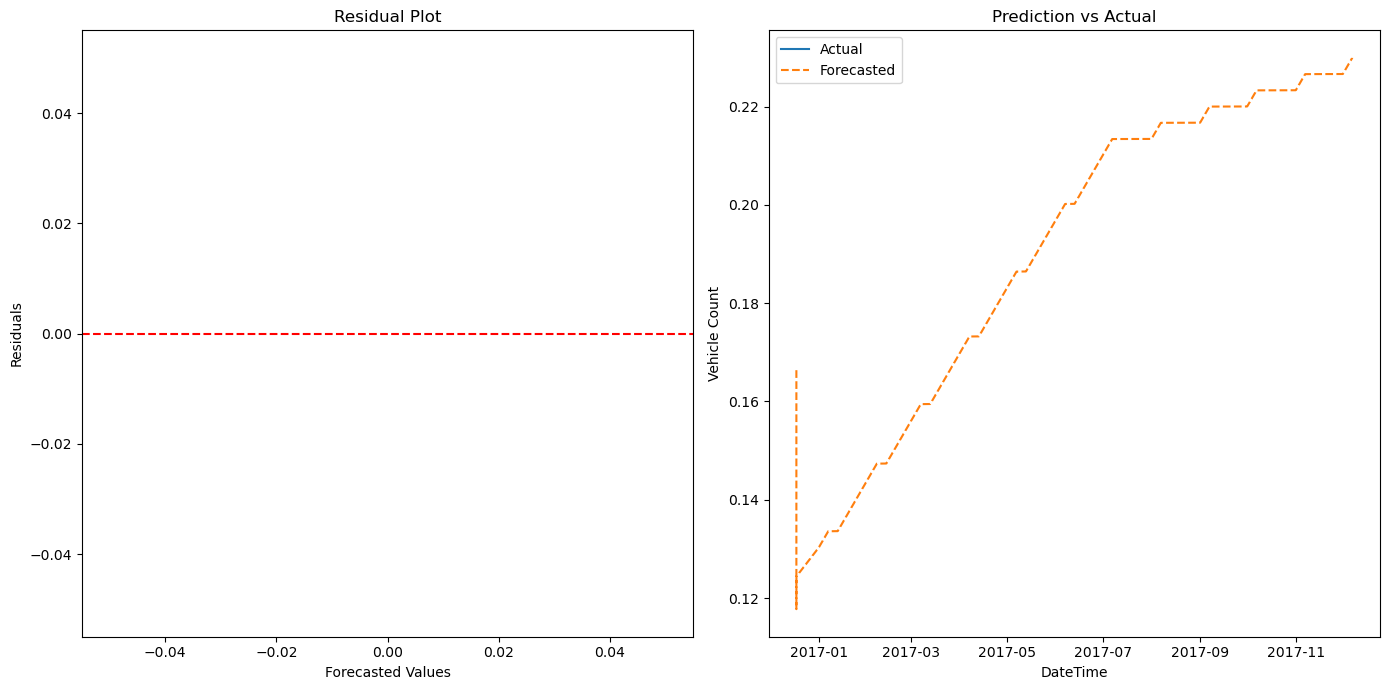

In [25]:
import matplotlib.pyplot as plt

# Ensure 'Vehicles' and 'best_forecast_aligned' are aligned
residuals = test['Vehicles'] - best_forecast_aligned

# Plot Residuals
plt.figure(figsize=(14, 7))

# Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(best_forecast_aligned, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Forecasted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Prediction vs Actual Plot
plt.subplot(1, 2, 2)
plt.plot(test.index, test['Vehicles'], label='Actual')
plt.plot(test.index, best_forecast_aligned, label='Forecasted', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Vehicle Count')
plt.title('Prediction vs Actual')
plt.legend()

plt.tight_layout()
plt.show()


# Arima is not a good model 

# LSTM  Model

### Preprocessing Data for LSTM

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

def reshape_for_lstm(X):
    return X.reshape((X.shape[0], X.shape[1], 1))

X_lstm = reshape_for_lstm(X_scaled)


### Define and Train LSTM Model:

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_lstm.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_lstm[train_index], y[train_index], epochs=50, batch_size=72, validation_data=(X_lstm[test_index], y[test_index]), verbose=2)


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
214/214 - 6s - 30ms/step - loss: 0.2336 - val_loss: 0.2237
Epoch 2/50
214/214 - 5s - 21ms/step - loss: 0.1498 - val_loss: 0.0936
Epoch 3/50
214/214 - 5s - 24ms/step - loss: 0.0283 - val_loss: 0.0315
Epoch 4/50
214/214 - 5s - 24ms/step - loss: 0.0088 - val_loss: 0.0242
Epoch 5/50
214/214 - 5s - 24ms/step - loss: 0.0077 - val_loss: 0.0499
Epoch 6/50
214/214 - 5s - 24ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 7/50
214/214 - 5s - 21ms/step - loss: 0.0058 - val_loss: 0.0064
Epoch 8/50
214/214 - 5s - 23ms/step - loss: 0.0057 - val_loss: 0.0125
Epoch 9/50
214/214 - 5s - 22ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 10/50
214/214 - 5s - 23ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 11/50
214/214 - 5s - 25ms/step - loss: 0.0055 - val_loss: 0.0067
Epoch 12/50
214/214 - 5s - 25ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 13/50
214/214 - 4s - 20ms/step - loss: 0.0056 - val_loss: 0.0105
Epoch 14/50
214/214 - 5s - 24ms/step - loss: 0.0054 - val_loss: 0.0067
Epoch 15/50
214

 # Training Gradient Boosting Model

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [47]:
# Make predictions
y_pred_lstm = model.predict(X_lstm[test_index])

# Convert predictions to a 1D array if necessary
y_pred_lstm = y_pred_lstm.flatten()

# Compute metrics
mae_lstm, rmse_lstm, r2_lstm = evaluate_model(y[test_index], y_pred_lstm)

print("LSTM Model:")
print("MAE:", mae_lstm)
print("RMSE:", rmse_lstm)
print("R-squared:", r2_lstm)


480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
LSTM Model:
MAE: 0.04454498560191935
RMSE: 0.07957188936630175
R-squared: 0.9729486603057832


In [48]:
# Make predictions
y_pred_gbm = gbm.predict(X_test)

# Compute metrics
mae_gbm, rmse_gbm, r2_gbm = evaluate_model(y_test, y_pred_gbm)

print("Gradient Boosting Model:")
print("MAE:", mae_gbm)
print("RMSE:", rmse_gbm)
print("R-squared:", r2_gbm)


Gradient Boosting Model:
MAE: 0.03748593251335749
RMSE: 0.11228696366210536
R-squared: 0.9461323394973686


In [49]:
results = {
    "ARIMA": {"MAE": mae, "RMSE": rmse, "R-squared": r2},
    "LSTM": {"MAE": mae_lstm, "RMSE": rmse_lstm, "R-squared": r2_lstm},
    "Gradient Boosting": {"MAE": mae_gbm, "RMSE": rmse_gbm, "R-squared": r2_gbm},
}

for model, metrics in results.items():
    print(f"\n{model} Model:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



ARIMA Model:
MAE: 1.054794353187264
RMSE: 1.5549694318982221
R-squared: -0.07634467101304088

LSTM Model:
MAE: 0.04454498560191935
RMSE: 0.07957188936630175
R-squared: 0.9729486603057832

Gradient Boosting Model:
MAE: 0.03748593251335749
RMSE: 0.11228696366210536
R-squared: 0.9461323394973686


# ------------------------- LSTM shows best performance--------------------------------

# Evaluating performance

### Prediction VS Actual pllot

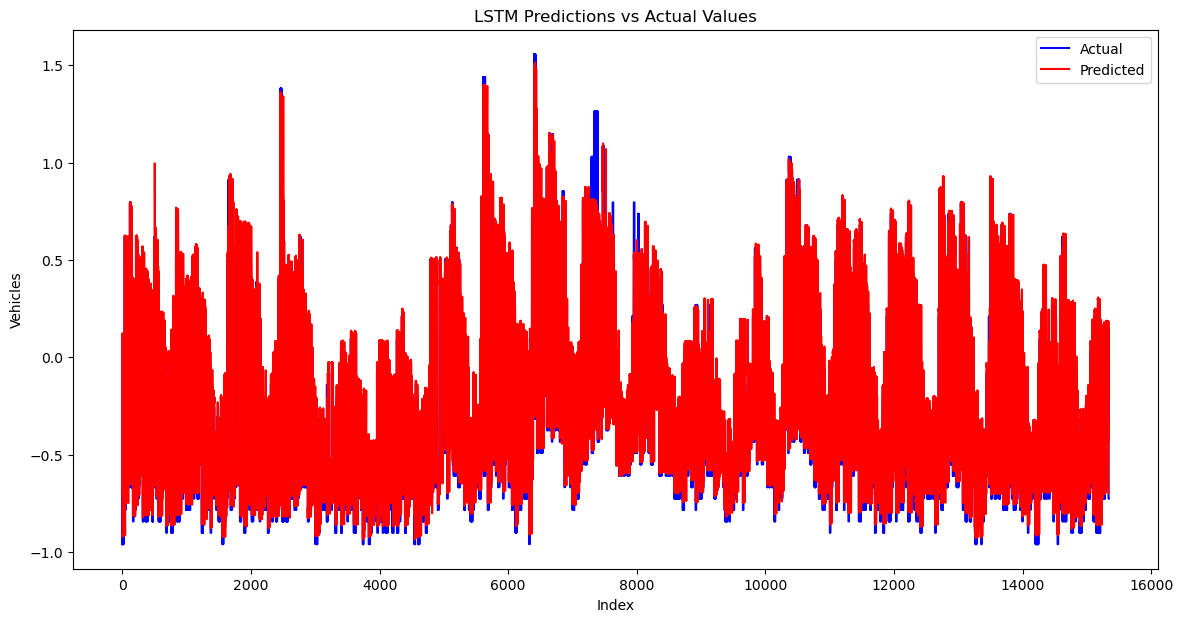

In [51]:
import matplotlib.pyplot as plt

# Use array indices for plotting
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred_lstm)), y_pred_lstm, label='Predicted', color='red')
plt.title('LSTM Predictions vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Vehicles')
plt.legend()
plt.show()


### Residual Plot


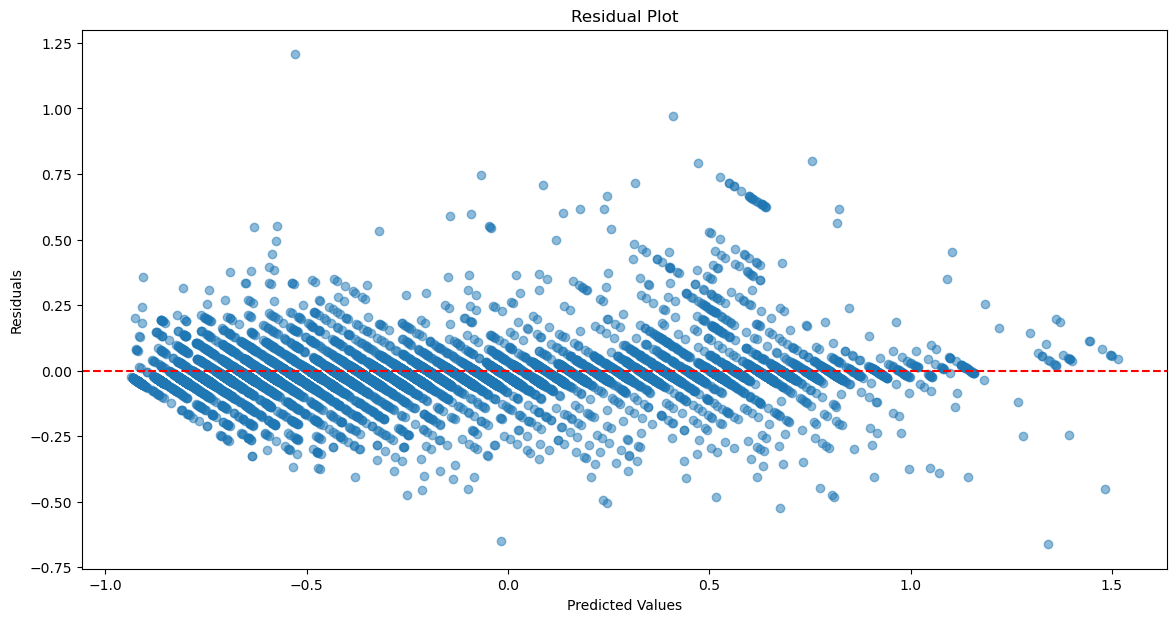

In [52]:
# Calculate residuals
residuals = y_test - y_pred_lstm

plt.figure(figsize=(14, 7))
plt.scatter(y_pred_lstm, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Error Distribution Chart

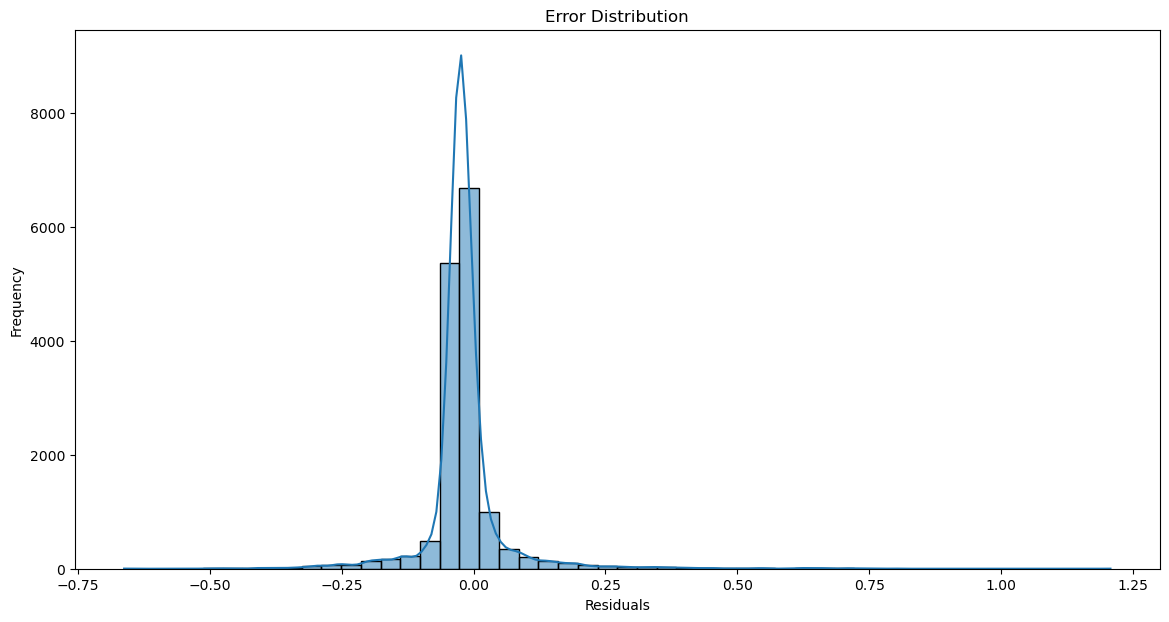

In [53]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
